## **Customer Service Requests Analysis**


**Background of Problem Statement :**

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

**Problem Objective :**

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service
 
 
 

In [78]:
# import the required libraries
import pandas as pd 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 

In [79]:
# Import a 311 NYC service request and convert the columns ‘Created Date’ and Closed Date’ to datetime datatype
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', parse_dates = ['Closed Date' ,'Created Date'], error_bad_lines=False,low_memory=False)

In [80]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


# 1. Data exploration and preprocessing 

In [81]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [82]:
# understand the data
df.shape

(300698, 53)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [84]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [85]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [86]:
# drop all NaN value in the City, Created Date, Closed Date columns
df.dropna(subset=['Created Date','Closed Date','City'],inplace=True)

In [87]:
# drop unnecessary column ((Plain text)  - Empty Field) and ((Plain text) - Unspecified) 
df = df.drop(columns=['School Not Found','School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'School Name','School Number','School Region',
       'School Code','School Phone Number','School Address','School City',
       'School State','School Zip','Park Facility Name','Landmark'])

In [88]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [89]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Borough', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [90]:
# create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing
df['Request_Closing_Time'] = df['Closed Date'].values - df['Created Date'].values 
df['Request_Closing_Time_in_mins'] = df['Request_Closing_Time']/np.timedelta64(1,'m')

In [91]:
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_in_mins
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,291.516667



# 2. Data Analysis and Visualization

In [93]:
# first check the Complaint Type
df['Complaint Type'].value_counts()

Blocked Driveway             76752
Illegal Parking              74311
Noise - Street/Sidewalk      47986
Noise - Commercial           35185
Derelict Vehicle             17542
Noise - Vehicle              17027
Animal Abuse                  7767
Traffic                       4494
Homeless Encampment           4415
Noise - Park                  4015
Vending                       3794
Drinking                      1272
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      422
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Squeegee                         4
Animal in a Park                 1
Name: Complaint Type, dtype: int64

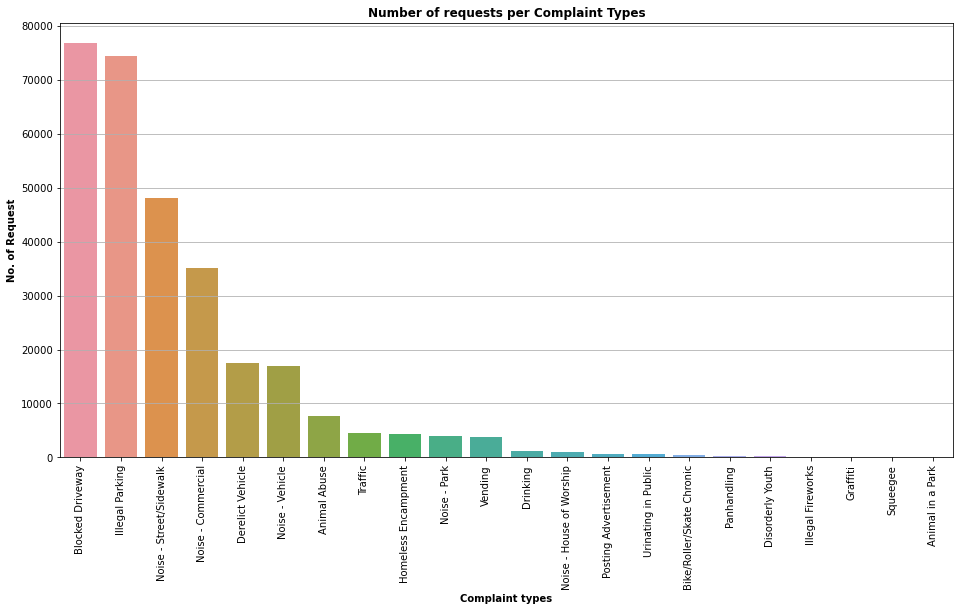

In [94]:
plt.figure(figsize=(16,8))
sns.countplot(x='Complaint Type', data=df , order= df['Complaint Type'].value_counts().index) 
plt.xticks(rotation=90)
txt = {'weight':'bold'}
plt.title('Number of requests per Complaint Types', fontdict=txt)
plt.xlabel('Complaint types', fontdict=txt)
plt.ylabel('No. of Request', fontdict=txt)
plt.grid(axis='y')
plt.show()

**First conclusion:**
The most complaints requests received are:
1. Blocked Driveway 
2. Illegal Parking
3. Noise - Commercial 
4. Noise - Street/Sidewalk  
5. Derelict Vehicle 
6. Noise - Vehicle    

In [95]:
# check city column
df['City'].value_counts()

BROOKLYN               98295
NEW YORK               65972
BRONX                  40697
STATEN ISLAND          12338
JAMAICA                 7294
ASTORIA                 6330
FLUSHING                5970
RIDGEWOOD               5162
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2733
ELMHURST                2673
WOODHAVEN               2463
MASPETH                 2461
LONG ISLAND CITY        2436
SOUTH OZONE PARK        2173
RICHMOND HILL           1902
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
FOREST HILLS            1688
JACKSON HEIGHTS         1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

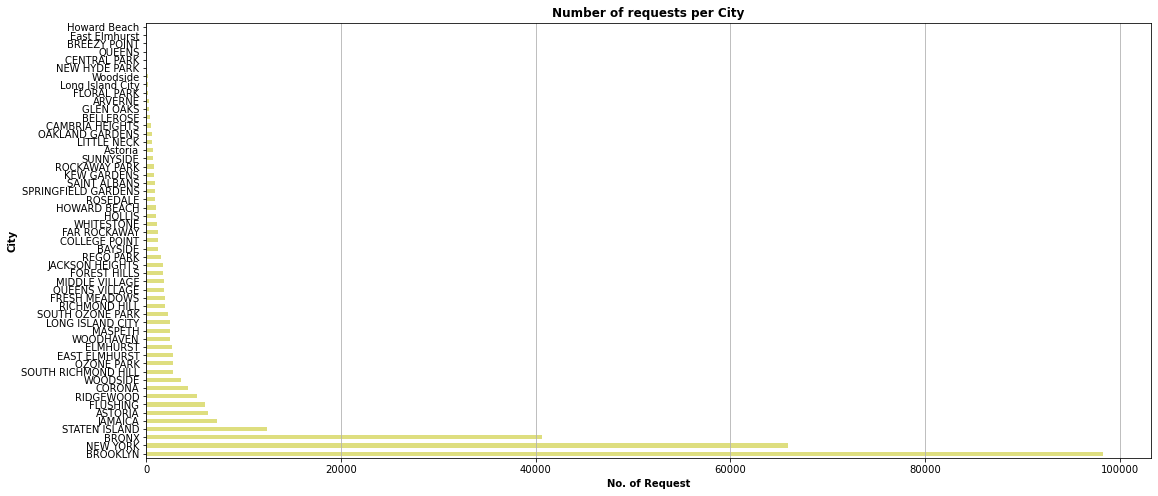

In [96]:
plt.figure(figsize=(18,8))
df['City'].value_counts().plot(kind='barh',color='y',alpha=.5)
plt.title('Number of requests per City', fontdict=txt)
plt.xlabel('No. of Request', fontdict=txt)
plt.ylabel('City', fontdict=txt)
plt.grid(axis='x')
plt.show()

**Second conclusion:**
Most complaints requests received from:
1. BROOKLYN
2. NEW YORK
3. BRONX
4. STATEN ISLAND  
5. ASTORIA
6. JAMAICA     

In [97]:
# check the locations
df['Location Type'].value_counts()

Street/Sidewalk               247076
Store/Commercial               20133
Club/Bar/Restaurant            17215
Residential Building/House      6953
Park/Playground                 4743
House of Worship                 927
Residential Building             227
Highway                          211
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Name: Location Type, dtype: int64

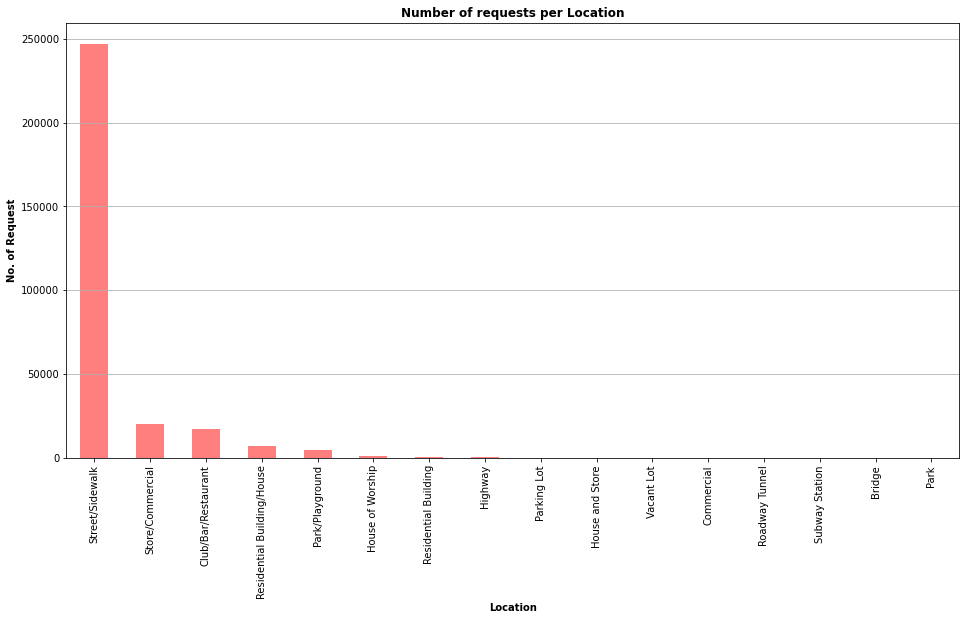

In [98]:
plt.figure(figsize=(16,8)) 
df['Location Type'].value_counts().plot(kind='bar',color='r',alpha=.5)
plt.title('Number of requests per Location', fontdict=txt)
plt.xlabel('Location', fontdict=txt)
plt.ylabel('No. of Request', fontdict=txt)
plt.grid(axis='y')
plt.show()

**Third conclusion:** 
Most complaints requests received from the following location :
1. Street/Sidewalk               
2. Store/Commercial               
3. Club/Bar/Restaurant            
4. Residential Building/House     
5. Park/Playground                 
6. House of Worship


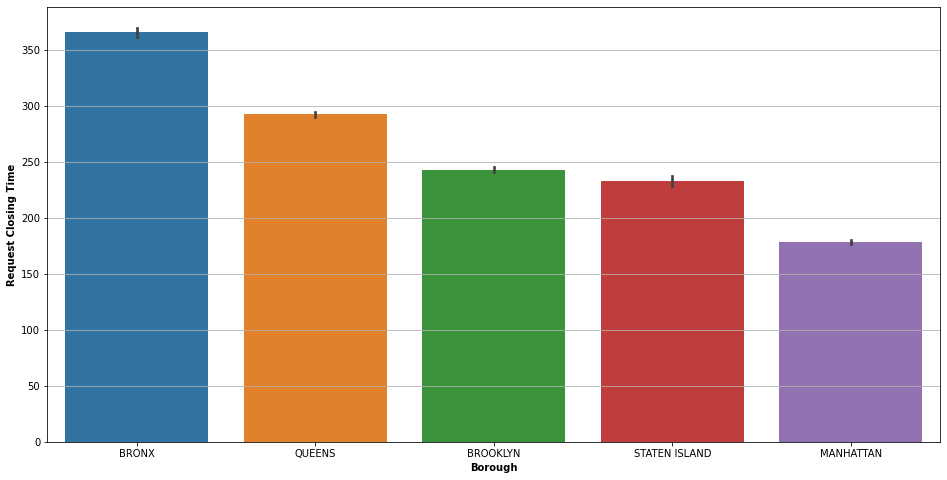

In [99]:
plt.figure(figsize=(16,8))
sns.barplot(x='Borough',y='Request_Closing_Time_in_mins',data=df,order=['BRONX','QUEENS','BROOKLYN','STATEN ISLAND','MANHATTAN'])
plt.xlabel('Borough', fontdict=txt)
plt.ylabel('Request Closing Time', fontdict=txt)
plt.grid(axis='y')
plt.show()

**Fourth conclusion:** BRONX has the maximum Request Closing Time

In [100]:
# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
complaints_by_cities = df.groupby(['City','Complaint Type'])['Request_Closing_Time_in_mins'].mean().unstack(level=1)
complaints_by_cities = complaints_by_cities.T 
complaints_by_cities

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,129.217544,300.010133,NaN,196.470721,763.480952,156.808333,440.129670,289.950362,681.350000,NaN,...,442.305000,209.540303,262.062179,891.722222,298.170347,693.174286,168.473810,298.051111,506.358213,NaN
Animal in a Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike/Roller/Skate Chronic,NaN,104.358889,NaN,NaN,294.000000,NaN,207.538333,300.282282,NaN,NaN,...,NaN,243.300000,1854.616667,NaN,244.642857,72.291667,188.670833,74.500000,728.925000,NaN
Blocked Driveway,151.558095,288.967068,294.877730,153.784306,605.964737,79.661111,375.705840,264.647022,461.758730,NaN,...,281.207240,265.655998,291.979468,542.152354,244.275218,418.103074,189.189503,331.377794,388.397344,384.372727
Derelict Vehicle,178.093210,581.354986,374.169444,201.586785,1030.088577,428.711111,553.654448,356.849385,966.646667,NaN,...,354.029538,623.911313,712.613610,700.194683,302.374670,589.651667,204.860573,447.005574,563.035493,298.000000
Disorderly Youth,215.475000,174.155556,NaN,178.383333,111.000000,NaN,254.304497,249.031019,NaN,NaN,...,105.550000,160.933333,183.900000,NaN,233.610870,224.425000,195.966667,NaN,73.000000,NaN
Drinking,14.316667,283.345238,NaN,114.000000,235.083333,158.000000,347.614894,212.433658,NaN,NaN,...,57.683333,292.871795,346.000725,290.694444,209.589905,276.356667,217.758333,171.977778,328.868889,NaN
Graffiti,92.000000,845.704167,NaN,273.094444,NaN,NaN,533.942593,494.592248,NaN,NaN,...,NaN,NaN,NaN,NaN,573.741667,35.550000,528.000000,NaN,539.761111,NaN
Homeless Encampment,108.887500,295.055208,NaN,172.533333,2348.000000,NaN,446.514035,281.689187,1367.366667,NaN,...,454.241667,110.212500,320.130303,226.783333,298.782629,431.374242,NaN,426.409259,403.030808,NaN


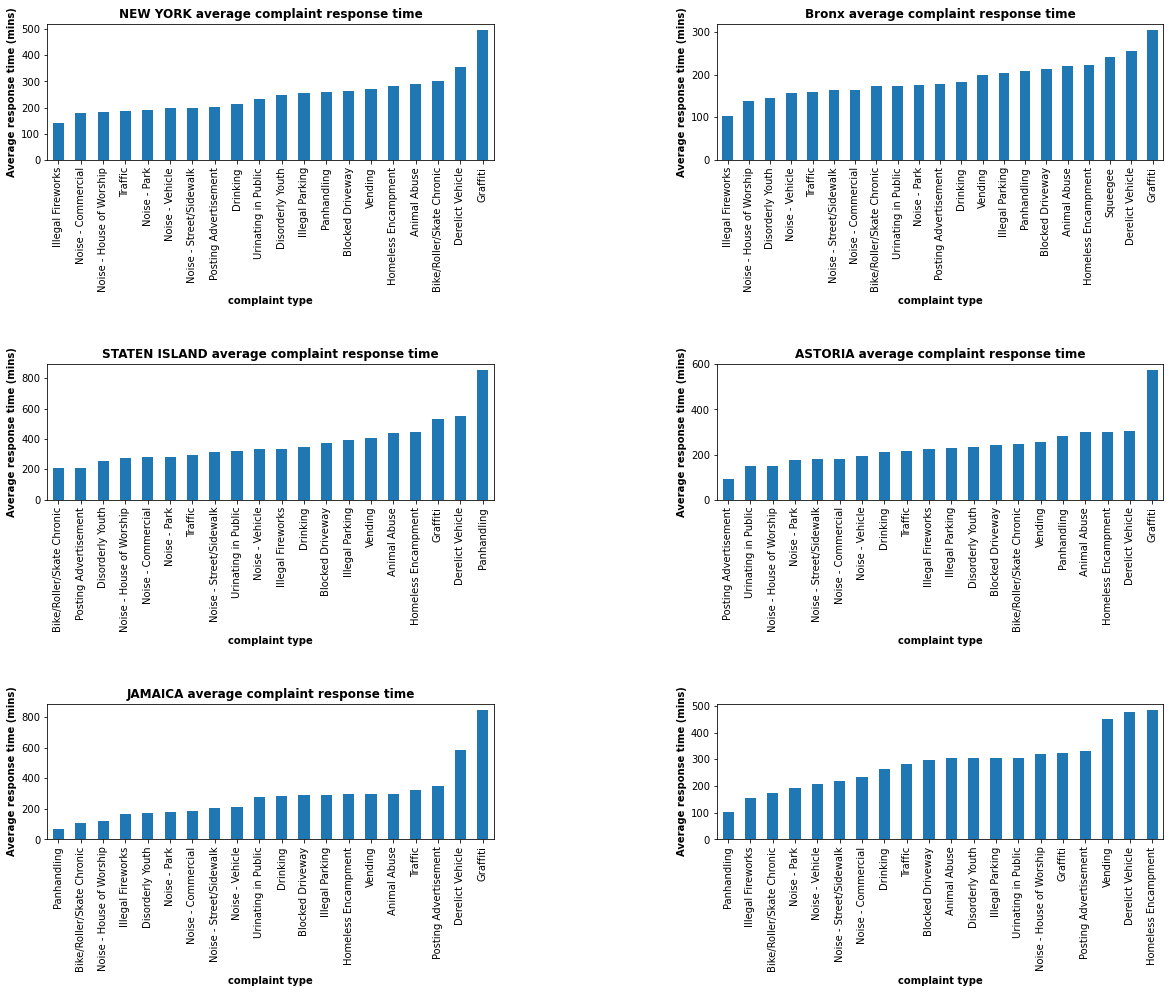

In [101]:
# plot the top 6 cities that have the most complaints requests 
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=1.5,wspace=0.5)

# 1. BROOKLYN
BROOKLYN = complaints_by_cities['BROOKLYN'].sort_values() 
plt.title('BROOKLYN average complaint response time', fontdict=txt)
plt.subplot(3,2,1)
BROOKLYN.dropna().plot.bar()
plt.xlabel('complaint type', fontdict=txt)
plt.ylabel('Average response time (mins)', fontdict=txt)
 

# 2. NEW YORK
NEW_YORK = complaints_by_cities['NEW YORK'].sort_values()
plt.title('NEW YORK average complaint response time', fontdict=txt)
plt.subplot(3,2,2)
NEW_YORK.dropna().plot.bar()
plt.xlabel('complaint type', fontdict=txt)
plt.ylabel('Average response time (mins)', fontdict=txt)
 

# 3. BRONX
BRONX = complaints_by_cities['BRONX'].sort_values() 
plt.title('Bronx average complaint response time', fontdict=txt)
plt.subplot(3,2,3)
BRONX.dropna().plot.bar()
plt.xlabel('complaint type', fontdict=txt)
plt.ylabel('Average response time (mins)', fontdict=txt)
 
# 4. STATEN ISLAND
STATEN_ISLAND = complaints_by_cities['STATEN ISLAND'].sort_values() 
plt.title('STATEN ISLAND average complaint response time', fontdict=txt)
plt.subplot(3,2,4)
STATEN_ISLAND.dropna().plot.bar()
plt.xlabel('complaint type', fontdict=txt)
plt.ylabel('Average response time (mins)', fontdict=txt)

# 5. ASTORIA
ASTORIA = complaints_by_cities['ASTORIA'].sort_values() 
plt.title('ASTORIA average complaint response time', fontdict=txt)
plt.subplot(3,2,5)
ASTORIA.dropna().plot.bar()
plt.xlabel('complaint type', fontdict=txt)
plt.ylabel('Average response time (mins)', fontdict=txt)

# 6. JAMAICA
JAMAICA = complaints_by_cities['JAMAICA'].sort_values() 
plt.title('JAMAICA average complaint response time', fontdict=txt)
plt.subplot(3,2,6)
JAMAICA.dropna().plot.bar()
plt.xlabel('complaint type', fontdict=txt)
plt.ylabel('Average response time (mins)', fontdict=txt)

plt.show()

# 3. Statistical test

**Whether the average response time across complaint types is similar or not (overall)**
 
**H0:** Average response time across complaints type is similar.

**H1:** Average response time across complaints type is not similar.

**alpha = 5%**

if p < alpha: Reject Null Hypothesis 

if p > alpha: Fail to reject Null Hypothesis 

In [113]:
# One Way F-test(Anova) 
from scipy.stats import f_oneway

df_TEST = df[['Complaint Type','Request_Closing_Time_in_mins']] 

data = {}
for complaint in df_TEST['Complaint Type'].unique():
    data[complaint] = np.log(df_TEST[df_TEST['Complaint Type']==complaint]['Request_Closing_Time_in_mins'])
    
f, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])

print("p-value for significance is: {} \nThe computed F statistic of the test is: {}".format(p,f))

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is: 0.0 
The computed F statistic of the test is: 2466.9824251961677
reject null hypothesis




*   Since the p value is less than alpha, the Null Hypothesis is Rejected and the average response time across complaints type is not similar.



**Are the type of complaint or service requested and location related?**

In [105]:
df_TEST_2 = df[['Complaint Type','Borough','City','Longitude','Latitude']]
df_TEST_2

,Complaint Type,Borough,City,Longitude,Latitude
0,Noise - Street/Sidewalk,MANHATTAN,NEW YORK,-73.923501,40.865682
1,Blocked Driveway,QUEENS,ASTORIA,-73.915094,40.775945
2,Blocked Driveway,BRONX,BRONX,-73.888525,40.870325
3,Illegal Parking,BRONX,BRONX,-73.828379,40.835994
4,Illegal Parking,QUEENS,ELMHURST,-73.874170,40.733060
...,...,...,...,...,...
300692,Noise - Commercial,MANHATTAN,NEW YORK,-73.991378,40.716053
300694,Blocked Driveway,QUEENS,RICHMOND HILL,-73.846087,40.694077
300695,Noise - Commercial,BROOKLYN,BROOKLYN,-73.944234,40.699590
300696,Noise - Commercial,BRONX,BRONX,-73.834587,40.837708


In [106]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
encoded_Complaint_Type = le.fit_transform(df_TEST_2['Complaint Type'])
encoded_Borough = le.fit_transform(df_TEST_2['Borough'])
encoded_City = le.fit_transform(df_TEST_2['City'])
df_TEST_2['Complaint Type'] = encoded_Complaint_Type
df_TEST_2['Borough'] = encoded_Borough
df_TEST_2['City'] = encoded_City
df_TEST_2

<ipython-input-106-5cd3db379181>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TEST_2['Complaint Type'] = encoded_Complaint_Type
<ipython-input-106-5cd3db379181>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TEST_2['Borough'] = encoded_Borough
<ipython-input-106-5cd3db379181>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Complaint Type,Borough,City,Longitude,Latitude
0,14,2,33,-73.923501,40.865682
1,3,3,1,-73.915094,40.775945
2,3,0,6,-73.888525,40.870325
3,10,0,6,-73.828379,40.835994
4,10,3,13,-73.874170,40.733060
...,...,...,...,...,...
300692,11,2,33,-73.991378,40.716053
300694,3,3,39,-73.846087,40.694077
300695,11,1,7,-73.944234,40.699590
300696,11,0,6,-73.834587,40.837708


In [107]:
df_TEST_2.corr(method='pearson')

,Complaint Type,Borough,City,Longitude,Latitude
Complaint Type,1.000000,-0.066206,0.095016,-0.180955,0.152851
Borough,-0.066206,1.000000,0.717794,0.021402,-0.249486
City,0.095016,0.717794,1.000000,-0.124040,-0.000568
Longitude,-0.180955,0.021402,-0.124040,1.000000,0.364964
Latitude,0.152851,-0.249486,-0.000568,0.364964,1.000000




*   After examine the Correlation Matrix, it is clear that there is no relationship between complaint type and location.

